In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from source.project_manager import (
    load_slurm_metadata,
    delete_slurm_data,
    check_slurm_data_exists,
)

In [36]:
project_metadata = load_slurm_metadata()
project_metadata = project_metadata.set_index(["stream_names","stream_statistic"])
project_metadata

method  alpha  \
stream_names          stream_statistic                               
log_probs             mean[X]           noise_interpolation    0.1   
                      mean[X^2]         noise_interpolation    0.1   
results_at_projection mean[X]           noise_interpolation    0.1   
                      mean[X^2]         noise_interpolation    0.1   
vanilla_grad_mask     mean[X]           noise_interpolation    0.1   
                      mean[X^2]         noise_interpolation    0.1   

                                       architecture  max_batches  min_change  \
stream_names          stream_statistic                                         
log_probs             mean[X]              resnet50          312     0.00001   
                      mean[X^2]            resnet50          312     0.00001   
results_at_projection mean[X]              resnet50          312     0.00001   
                      mean[X^2]            resnet50          312     0.00001   
vanilla_grad_mask     mean[X]              resnet50          312     0.00001   
                      mean[X^2]            resnet50          312     0.00001   

                                        seed  batch_size  num_classes  \
stream_names          stream_statistic                                  
log_probs             mean[X]             42          32         1000   
                      mean[X^2]           42          32         1000   
results_at_projection mean[X]             42          32         1000   
                      mean[X^2]           42          32         1000   
vanilla_grad_mask     mean[X]             42          32         1000   
                      mean[X^2]           42          32         1000   

                                             input_shape  image_index  \
stream_names          stream_statistic                                  
log_probs             mean[X]           (1, 224, 224, 3)            0   
                      mean[X^2]         (1, 224, 224, 3)            0   
results_at_projection mean[X]           (1, 224, 224, 3)            0   
                      mean[X^2]         (1, 224, 224, 3)            0   
vanilla_grad_mask     mean[X]           (1, 224, 224, 3)            0   
                      mean[X^2]         (1, 224, 224, 3)            0   

                                       monitored_statistic   monitored_stream  \
stream_names          stream_statistic                                          
log_probs             mean[X]                       meanx2  vanilla_grad_mask   
                      mean[X^2]                     meanx2  vanilla_grad_mask   
results_at_projection mean[X]                       meanx2  vanilla_grad_mask   
                      mean[X^2]                     meanx2  vanilla_grad_mask   
vanilla_grad_mask     mean[X]                       meanx2  vanilla_grad_mask   
                      mean[X^2]                     meanx2  vanilla_grad_mask   

                                         dataset  label  time_to_compute  \
stream_names          stream_statistic                                     
log_probs             mean[X]           imagenet     46        34.469386   
                      mean[X^2]         imagenet     46        34.469386   
results_at_projection mean[X]           imagenet     46        34.469386   
                      mean[X^2]         imagenet     46        34.469386   
vanilla_grad_mask     mean[X]           imagenet     46        34.469386   
                      mean[X^2]         imagenet     46        34.469386   

                                        batch_index  \
stream_names          stream_statistic                
log_probs             mean[X]                   312   
                      mean[X^2]                 312   
results_at_projection mean[X]                   312   
                      mean[X^2]                 312   
vanilla_grad_mask     mean[X]                   312   
                      mean[X^2]       

In [40]:
project_metadata.loc[("vanilla_grad_mask"),:]

,method,alpha,architecture,max_batches,min_change,seed,batch_size,num_classes,input_shape,image_index,monitored_statistic,monitored_stream,dataset,label,time_to_compute,batch_index,monitored_statistic_change,paths,path_prefix
stream_statistic,,,,,,,,,,,,,,,,,,,
mean[X],noise_interpolation,0.1,resnet50,312,0.00001,42,32,1000,"(1, 224, 224, 3)",0,meanx2,vanilla_grad_mask,imagenet,46,34.469386,312,0.000654,/local_storage/users/amirme/raw_data/2023-08-2...,2023-08-29_11-30-38-019928
mean[X^2],noise_interpolation,0.1,resnet50,312,0.00001,42,32,1000,"(1, 224, 224, 3)",0,meanx2,vanilla_grad_mask,imagenet,46,34.469386,312,0.000654,/local_storage/users/amirme/raw_data/2023-08-2...,2023-08-29_11-30-38-019928


In [26]:
vgm = project_metadata["stream_names"] == "vanilla_grad_mask"
vgm = project_metadata[vgm]
vgm = vgm["paths"].apply(lambda x:np.load(x).squeeze())

In [27]:
temp = vgm.to_list()

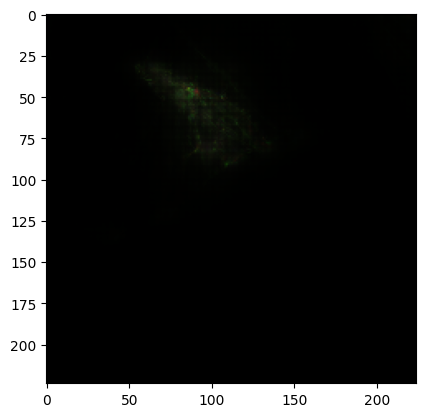

In [29]:
plt.imshow(temp[1])